##Імпорт бібліотек

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
%matplotlib inline

from google.colab import drive

## Дані

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Python/ML/DATA/medical-charges.csv')

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

###Змінні

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

In [ ]:
target = non_smoker_df.charges

##Функції

In [ ]:
#Гістограма з боксплотом

fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
#розподіл
px.histogram(df, x='smoker', color='sex', title='Smoker')

In [ ]:
#скаттерплот для відфільтрованих даних за стовпцем
fig = px.scatter(df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [57]:
def estimate_charges(age, w, b):
    return w * age + b

In [58]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [59]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

##Завдання

###Завдання1


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [16]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Відповідь:**
1. Подивитись як куріння впливає на вартість страхування. Можливо вивести коефіцієнт
2. Подивитись як регіон впливає на вартість страхування. Можливо в якихось регіонах закладено несприятливі умови (виробництво, клімат). Подивитсь середню вартість страхування за віковими групами та регіонами.
3. Як впливає стать за віковими групами на вартість страхування. Перевірити гіпотезу чи жінки молодого та середнього віку, які не мають дітей але з однакрвими іншими показниками, платять таку саму вартість, як ті, що вже мають дітей. Перевірка чи закладається можливість оплати ведення вагітності та пологів.


###Завдання 2

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

#### Стать

In [12]:
df.sex.value_counts(normalize=True)

sex
male      0.505232
female    0.494768
Name: proportion, dtype: float64

In [8]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження:**
1. Даний розподіл схожий на правоскошений розподіл.
2. Кількість клієнтів за статтю переважно рівномірно розподілена за річними платежами, окрім платежів 0-2000 (переважають чоловіки), 2000-4000 (переважають жінки)

####Регіон

In [13]:
df.region.value_counts(normalize=True)

region
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: proportion, dtype: float64

In [11]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'grey', 'red', 'yellow'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження:**
1. Даний розподіл схожий на правоскошений розподіл.
2. Кількість клієнтів за регіонами рівномірно розподілені за річними платежами.

###Завдання3

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

####Регіон

In [18]:
px.histogram(df, x='smoker', color='region', title='Smoker')

In [19]:
df[df.smoker == 'yes'].region.value_counts(normalize=True)

region
southeast    0.332117
northeast    0.244526
southwest    0.211679
northwest    0.211679
Name: proportion, dtype: float64

In [20]:
df[df.smoker == 'no'].region.value_counts(normalize=True)

region
southeast    0.256579
northwest    0.250940
southwest    0.250940
northeast    0.241541
Name: proportion, dtype: float64

**Спостереження:**
1. Найбільше курців в регіоні "Southeast": на 10% у порівнянні з курцями в інших регіонах


####Діти

In [21]:
px.histogram(df, x='smoker', color='children', title='Smoker')

In [22]:
df[df.smoker == 'yes'].children.value_counts(normalize=True)

children
0    0.419708
1    0.222628
2    0.200730
3    0.142336
4    0.010949
5    0.003650
Name: proportion, dtype: float64

In [23]:
df[df.smoker == 'no'].children.value_counts(normalize=True)

children
0    0.431391
1    0.247180
2    0.173872
3    0.110902
4    0.020677
5    0.015977
Name: proportion, dtype: float64

**Спостереження:**
1. Серед курців майже немає клієнтів з 5 дітьми
2. Серед клієнтів приблизно 40 відсотків не мають дітей і тенденція однакова як для курців так і некурців.
3. Щодо 0-4(включно) дітей попорція розподілу зберігається для двох груп

###Завдання 4

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [37]:
px.violin(df, y='charges', x='children', box=True)

In [36]:
px.violin(df, y='charges', x='children', color='smoker', box=True)

**Спостереження:**
1. Щодо клієнтів у яких 0- 3 дитини - розподіл данних щодо вартості страхування аналогічні.
2. Щодо клієнтів з 4-5 дітьми тенденція до зменшення викидів
3. У клієнтів з 5 дітьми - розподіл дуже схожий на нормальний, бо там майже немає курців
4. Можемо побачити, що основний вплив на розподіл робить факт куріння.


###Завдання 5

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [39]:
non_smoker_df = df[df.smoker == 'no']

In [40]:
def estimate_charges(age, w, b):
    return w * age + b

In [41]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

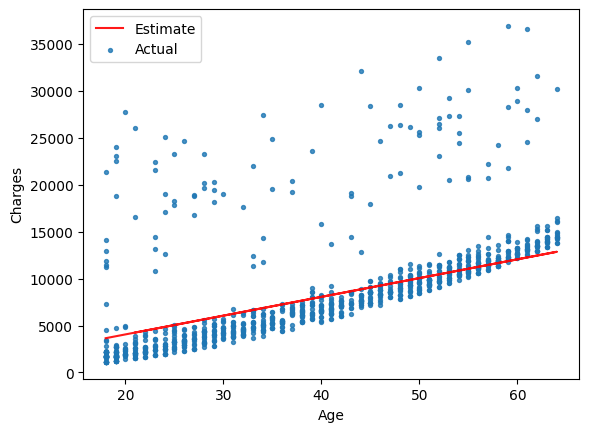

In [45]:
w = 200
b = 50
df =  non_smoker_df
try_parameters(df, w, b)

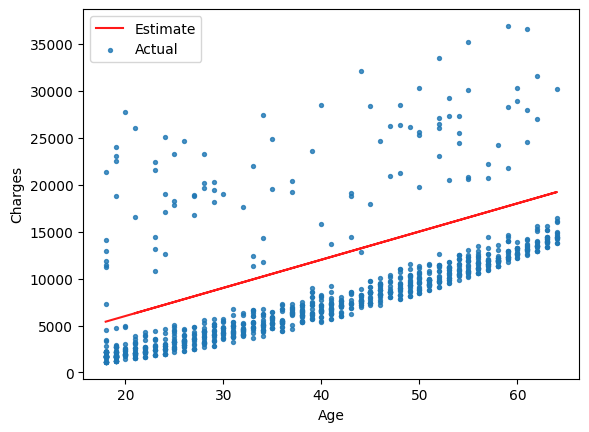

In [46]:
w = 300
b = 10
df =  non_smoker_df
try_parameters(df, w, b)

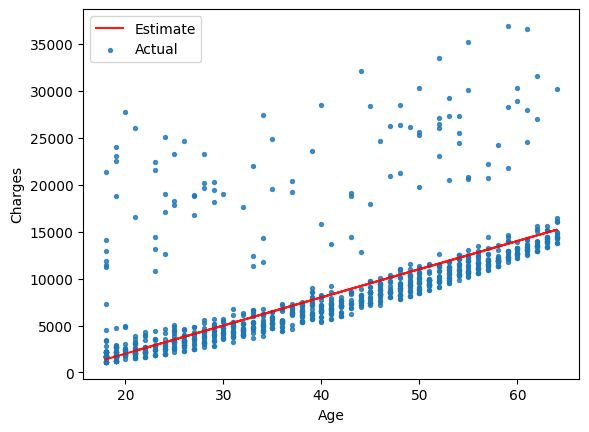

In [56]:
w = 300
b = -4000
df =  non_smoker_df
try_parameters(df, w, b)

###Завдання 6

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

RMSE Loss:  4725.9133994520325


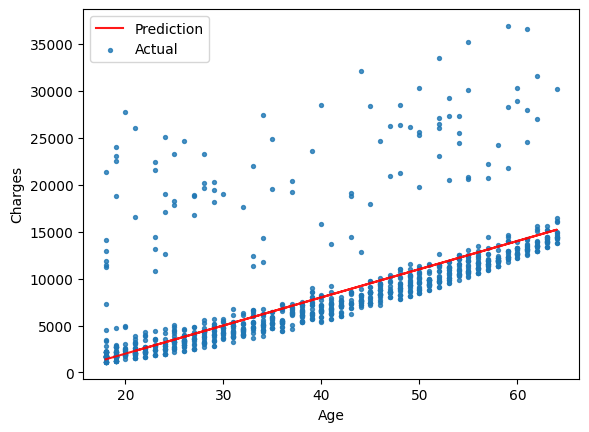

In [60]:
w = 300
b = -4000
try_parameters(w, b)

RMSE Loss:  4683.929633926176


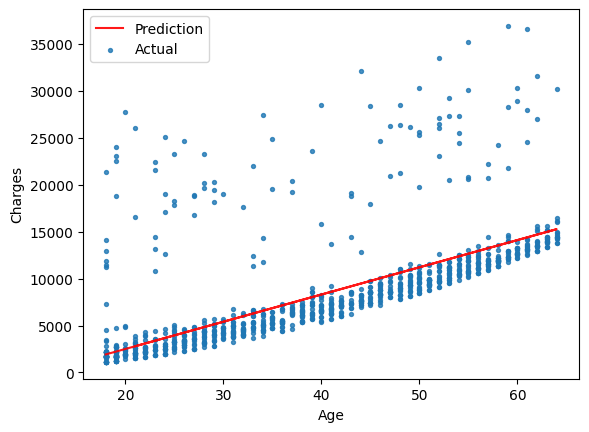

In [82]:
w = 290
b = -3300
try_parameters(w, b)

**Відповідь:**
1. Найнижче значення, яке змогла досягти - 4683
2. Спочатку експерементувати з кутом нахилу прямої - w, а потім з - b. Потім експерементувати з RMSE.
RMSE враховує і викиди, тому вважаю за необхідне перед побудовою лінійного графіка проаналізувати викиди і що на них впливає.